In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_excel(r'C:\Users\prajw\Documents\ResaluteAI.in\PFA\train.xlsx')


In [3]:
# Preprocess the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

In [4]:

# Define and fit KMeans
n_clusters = 3  # Adjust based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

def preprocess_new_data_point(new_data_point, scaler):
    # Convert new_data_point to a numpy array
    new_data_point_array = np.array(new_data_point).reshape(1, -1)
    
    # Scale the new data point
    new_data_scaled = scaler.transform(new_data_point_array)
    
    return new_data_scaled

def predict_cluster(new_data_point, scaler, kmeans):
    # Preprocess new data point
    new_data_scaled = preprocess_new_data_point(new_data_point, scaler)
    
    # Predict the cluster
    cluster = kmeans.predict(new_data_scaled)
    
    return cluster[0]

def get_user_input(num_features):
    print(f"Please enter {num_features} values for the new data point:")
    user_input = []
    for i in range(num_features):
        value = float(input(f"Feature {i+1}: "))
        user_input.append(value)
    return user_input

c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
# Number of features in your dataset (ensure this matches the actual number of features)
num_features = len(df.select_dtypes(include=['float64', 'int64']).columns)

In [6]:
# Get user input
new_data_point = get_user_input(num_features)

Please enter 18 values for the new data point:


In [7]:
# Predict cluster
cluster_label = predict_cluster(new_data_point, scaler, kmeans)
print(f'The new data point belongs to cluster: {cluster_label}')

The new data point belongs to cluster: 1


c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


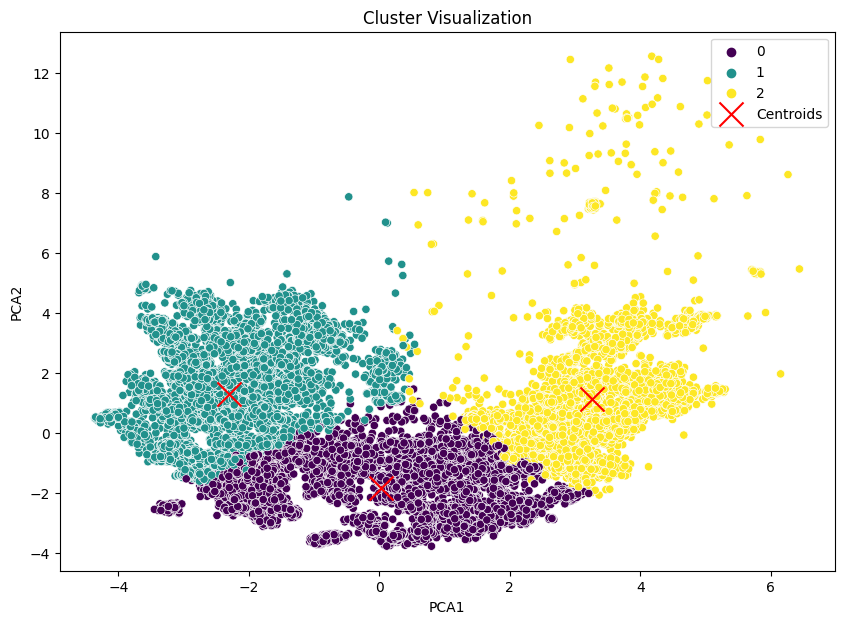

In [8]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', marker='o')

# Plot cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='x', label='Centroids')

plt.title('Cluster Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()